In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Import the data
notes = pd.read_csv('myopia.csv')
notes.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
notes.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [4]:
notes["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [5]:
 # Split the dataframe into data and target
y = notes["MYOPIC"].values
X = notes.drop("MYOPIC", axis=1)

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Create a scaler to standardize the data
scaler = StandardScaler()

In [8]:
# Train the scaler with the X_train data.
scaler.fit(X_train)

StandardScaler()

In [9]:
# Transform X_train and X_test.
# Note that the scaler used to transform X_train and X_test was trained on X_train.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Standarize data with StandarScaler
notes_scaled = StandardScaler().fit_transform(notes)
print(notes_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415   2.57480672]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415  -0.38837867]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897 -0.38837867]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415   2.57480672]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897 -0.38837867]]


In [11]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the iris data.
notes_pca = pca.fit_transform(notes_scaled)

In [13]:
# Transform PCA data to a DataFrame
notes_iris_pca = pd.DataFrame(
    data=notes_pca, columns=["principal component 1", "principal component 2"]
)
notes_iris_pca.head()

,principal component 1,principal component 2
0,0.782672,0.899775
1,-0.618457,-1.586377
2,-0.986671,-0.653266
3,0.351736,0.943838
4,-0.402403,-2.793421


In [14]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.19869149, 0.14662758])

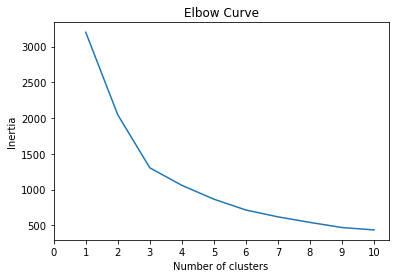

In [15]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(notes_iris_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(notes_iris_pca)

# Predict clusters
predictions = model.predict(notes_iris_pca)

# Add the predicted class column to the dataframe
notes_iris_pca["class"] = model.labels_
notes_iris_pca.head()

,principal component 1,principal component 2,class
0,0.782672,0.899775,2
1,-0.618457,-1.586377,0
2,-0.986671,-0.653266,1
3,0.351736,0.943838,2
4,-0.402403,-2.793421,0


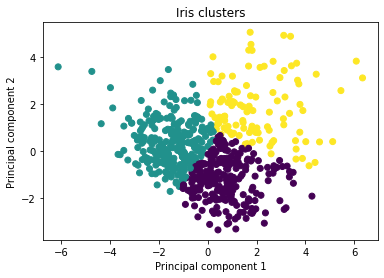

In [17]:
# Visualize the clusters
plt.scatter(x=notes_iris_pca['principal component 1'], y=notes_iris_pca['principal component 2'], c=notes_iris_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Iris clusters')
plt.show()
